In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [98]:
filelocation = '../uas_ml/dataset/dataset_hijab.xlsx'

In [99]:
df_jual = pd.read_excel(filelocation, sheet_name='laporan penjualan', skiprows=3)

In [100]:
df_jual = df_jual.rename(columns={
    'NO': 'NO',
    'TANGGAL': 'TANGGAL',
    'KODE': 'KODE',
    'NAMA BARANG': 'NAMA BARANG',
    'KATEGORI': 'KATEGORI',
    'DESAIN': 'DESAIN',
    'HARGA JUAL': 'HARGA JUAL',
    'HARGA BELI': 'HARGA BELI',
    'LABA': 'LABA'
})

In [101]:
df_jual = df_jual.dropna(subset=['NO'])

In [102]:
df_jual.head()

,NO,TANGGAL,KODE,NAMA BARANG,KATEGORI,DESAIN,HARGA JUAL,HARGA BELI,LABA
1,1.0,2024-02-01,H-01,PASMINA OVAL,HIJAB,POLOS,120000.0,140000.0,20000.0
2,2.0,2024-02-01,H-25,SEGIEMPAT PARIS,HIJAB,POLOS,70000.0,90000.0,20000.0
3,3.0,2024-02-01,H-21,SEGIEMPAT VOAL,HIJAB,POLOS,30000.0,45000.0,15000.0
4,4.0,2024-02-01,H-05,PASMINA SHIMMER SILK,HIJAB,POLOS,80000.0,100000.0,20000.0
5,5.0,2024-02-01,H-04,PASMINA CERUTY,HIJAB,BORDIR,110000.0,125000.0,15000.0


In [103]:
item_sales_count = df_jual['KODE'].value_counts()
threshold = item_sales_count.median()

In [104]:
df_jual['LARIS'] = df_jual['KODE'].apply(lambda x: 1 if item_sales_count[x] > threshold else 0)

In [105]:
df_jual

,NO,TANGGAL,KODE,NAMA BARANG,KATEGORI,DESAIN,HARGA JUAL,HARGA BELI,LABA,LARIS
1,1.0,2024-02-01,H-01,PASMINA OVAL,HIJAB,POLOS,120000.0,140000.0,20000.0,1
2,2.0,2024-02-01,H-25,SEGIEMPAT PARIS,HIJAB,POLOS,70000.0,90000.0,20000.0,1
3,3.0,2024-02-01,H-21,SEGIEMPAT VOAL,HIJAB,POLOS,30000.0,45000.0,15000.0,1
4,4.0,2024-02-01,H-05,PASMINA SHIMMER SILK,HIJAB,POLOS,80000.0,100000.0,20000.0,1
5,5.0,2024-02-01,H-04,PASMINA CERUTY,HIJAB,BORDIR,110000.0,125000.0,15000.0,1
...,...,...,...,...,...,...,...,...,...,...
465,465.0,2024-02-16,H-18,BERGO INSTAN VOAL,HIJAB,POLOS,70000.0,90000.0,20000.0,1
466,466.0,2024-02-16,H-02,PASMINA SILK LASERCUT,HIJAB,POLOS,115000.0,130000.0,15000.0,0
467,467.0,2024-02-16,H-04,PASMINA CERUTY,HIJAB,BORDIR,110000.0,125000.0,15000.0,1
468,468.0,2024-02-16,H-05,PASMINA SHIMMER SILK,HIJAB,POLOS,80000.0,100000.0,20000.0,1


In [106]:
X = df_jual.drop(columns='LARIS')
y = df_jual['LARIS']

In [107]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(375, 9) (94, 9) (375,) (94,)


In [108]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['HARGA JUAL', 'HARGA BELI', 'LABA']),
    ('categoric', OneHotEncoder(sparse_output=False), ['KODE', 'NAMA BARANG', 'KATEGORI', 'DESAIN']),
])

In [109]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

In [111]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['HARGA JUAL', 'HARGA BELI',
                                                   'LABA']),
                                                 ('categoric',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['KODE', 'NAMA BARANG',
                                                   'KATEGORI', 'DESAIN'])])),
                ('classifier', GaussianNB())])

In [112]:
y_pred = pipeline.predict(x_test)

In [113]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [114]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7979
Precision: 0.7957
Recall: 1.0000
F1 Score: 0.8862


In [115]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.05      0.10        20
           1       0.80      1.00      0.89        74

    accuracy                           0.80        94
   macro avg       0.90      0.53      0.49        94
weighted avg       0.84      0.80      0.72        94



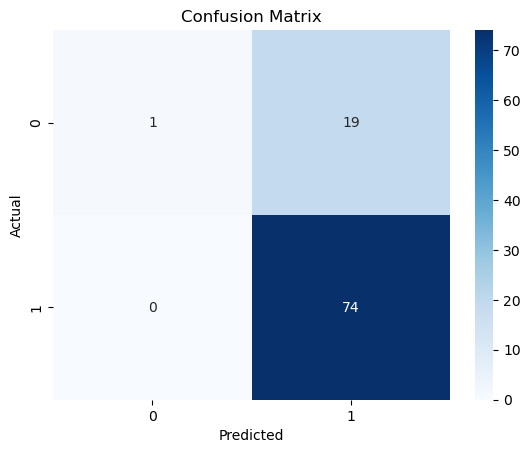

In [117]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [118]:
y_pred_proba = pipeline.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

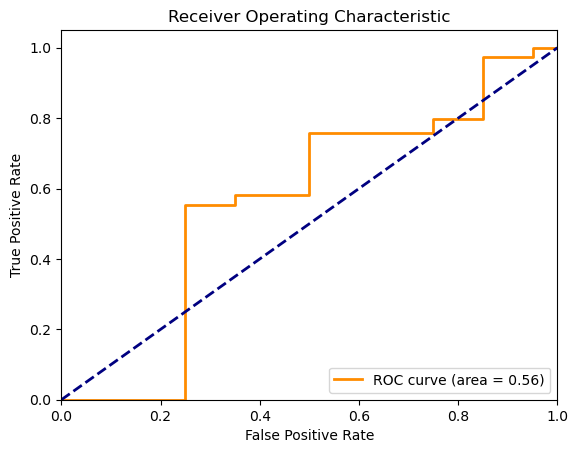

In [119]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [120]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

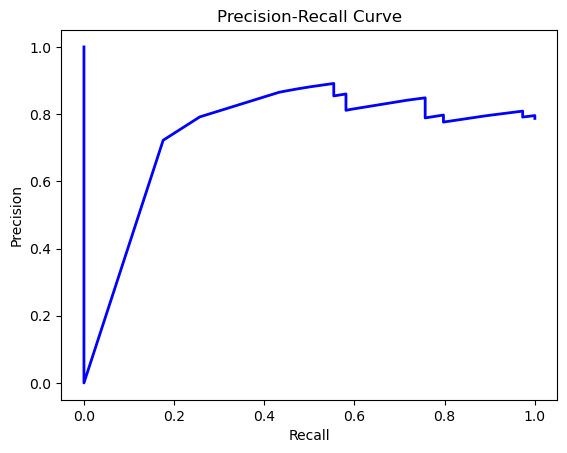

In [122]:
plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [123]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [124]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7978723404255319
Precision: 0.7956989247311828
Recall: 1.0
F1 Score: 0.8862275449101796

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.05      0.10        20
           1       0.80      1.00      0.89        74

    accuracy                           0.80        94
   macro avg       0.90      0.53      0.49        94
weighted avg       0.84      0.80      0.72        94


Confusion Matrix:
 [[ 1 19]
 [ 0 74]]


In [125]:
x_test['LARIS_PREDICTED'] = y_pred

In [126]:
laris_items = x_test[x_test['LARIS_PREDICTED'] == 1]

In [127]:
most_frequent_item = laris_items['NAMA BARANG'].value_counts().idxmax()
most_frequent_item_count = laris_items['NAMA BARANG'].value_counts().max()

In [128]:
print(f"Nama barang terlaris yang diprediksi adalah: {most_frequent_item} dengan jumlah {most_frequent_item_count} kali prediksi laris.")

Nama barang terlaris yang diprediksi adalah: PENITI dengan jumlah 13 kali prediksi laris.
